# Compression

In [3]:
from myst_nb import glue

% Standards de compression fournis par
% l'ITU (\emph{International Telecommunication Union}) et
% l'ISO (\emph{International Organization for Standardization})

% 1950~: conceptualisation (Shannon, Golay, Hamming, \dots)
% 1960~: conquête spatiale
% 1970~: révolution informatique
% 1980~: réseaux (minitel), données numérisées (CD)
% 1990~: internet, téléphonie mobile
% 2000~: électronique et informatique grand public
% 2010~: données massives (\emph{big data})
% 2020~: internet des objets

## Introduction

Do you know how bytes are needed to code one second of Full HD video?
Let me recall that this standard is characterized by images of size 1920 × 1080, each of the three channels (RGB) is coded with 1 byte, and there are 50 frames per second.

```{toggle}
One second contains 1920 × 1080 × 3 × 50 = 311 040 000 bytes, or around 311 Mb.
Thus, a DVD (4,7 Gb) can store only 15 s of a movie...
```

This example shows the need for image compression!
The goal of image compression is to hold the _information_ contained in the image with fewer bytes than the original image.
OK, but how to quantify information?
In 1948, [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) proposed to consider that an image or a message is very informative if it is unlikely.
This definition is currently still used and needs to model the problem by using probabilities (but this is out of the scope of this course).

We distinguish two kinds of compression:

* With **lossless compression**, no information is lost during compression
  (_i.e._ the original image and the compressed image are perfectly identical.
  It is possible to reach a compression ratio up to 1/10
  (the size in bytes of the compressed image is 1/10 times the original one).
  
* In **lossy compression**, we accept to loose information during compression
  (while ensuring that the original image still remain close to the original one).
  The compression ratio can reach 1/100!

## Lossless compression

Here are two examples of lossless image compression.

### Run-length encoding

RLE (run-length encoding) replaces a sequence of pixels of the same color with the number of pixels in that sequence.
Therefore, the image

```{glue:figure} G:compression:rle
:name: "F:compression:rle"

A 3 × 3 image.
```

is encoding without compression with 9 bytes:

$$
  \begin{pmatrix} 0 & 0 & 0 & 255 & 255 & 255 & 255 & 128 & 128 \end{pmatrix}.
$$

By reading the image column after column, we see 3 pixels with intensity 0, 4 pixels with intensity 255, and 2 pixels with intensity 128.
Thus the image is encoded in RLE with only 6 bytes:

$$
  \begin{pmatrix} 3 & 0 & 4 & 255 & 2 & 128 \end{pmatrix}.
$$

In this example, the compression rate is 6/9 = 2/3.

In computers, the BMP format is based on RLE compression.

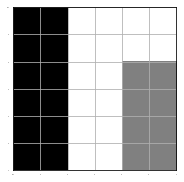

In [17]:
from numpy import array
from matplotlib.pyplot import figure, imshow, tick_params, grid

fig = figure(figsize=(3,3))
img = array([[0, 255, 255], [0, 255, 128], [0, 255, 128]])
imshow(img, cmap="gray")
tick_params(axis='both', labelsize=0, length=0)
grid()
glue("G:compression:rle", fig, display=False)

### Lempel-Ziv-Welch Algorithm

The LZW algorithm (Lempel-Ziv-Welch, 1984) is an improvement of the LZ78 algorithm (1978).
The principle is to build a dictionary of existing groups of pixels and to assign a code to each group.
It is used in format like GIF or TIFF.

The algorithm is the following one:
<pre>
Initialize the dictionary with all the possible intensities
For each pixel:
  Look to the longest sequence in the dictionary that starts at this pixel
  Replace this sequence with the corresponding code
  Add to the dictionary the sequence followed by the next pixel
</pre>

## Lossy compression

The most famous compression format for images is JPEG.
The JPEG format was created by the Joint Photographic Experts Group in 1992.

The main idea of JPEG compression is to apply a specific tranform on the image (namely, the discrete cosine transform)
and to cancel some coefficients of the transform.
Actually, the JPEG compression is a sequence of several steps, including:
* use another color space instead of the usual RGB representation,
* downsample the image
* split the image into 8 $\times$ 8 sub-images
* compute the the discrete cosine transform (DCT) of each sub-image
* quantification of the DCT coefficients

Other minor steps are also existing in the pipe-line of JPEG compression.
Now let's have a look on the previous major steps.

### Changing the color space

[Numerous color spaces](https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses) exist aside of the usual RGB one.
Among them, the YCbCr is the one used in JPEG compression.
YCbCr has also three channels:
Y represents the luma (_i.e._ brightness or grayscale image), and Cb and Cr are the blue and red chroma components.

FIGURE X represents the components R, G, B (top) and Y, Cb, Cr (bottom) of the same image, for a comparison.

```
FIG X
```

In FIGURE Y, the image is recomposed by using only two of the three channels, for each color space.
As you can see, the image is visible in each recomposition, except the one where the channel Y is missing.
Indeed, the human eye is more sensible to the brightness of an image (carried by Y) than another channel.
Therefore, the idea is to compress the channel Y less than the chroma channels.

```
FIG Y
```


% ================================================================================================================================================= %

\begin{frame}{\sqnum{2}Sous-échantillonnage}

L'\oe{}il humain est plus sensible à la luminosité d'une image (composante Y) qu'à la couleur (composantes Cb et Cr)\\
(95~\% de bâtonnets pour la lumière~; 5~\% de cônes pour la couleur).

% \medskip

% $\Rightarrow$ Utilisation de l'espace YCbCr pour permettre une compression plus importante sans altérer la qualité de l'image.

\medskip\pause

$\Rightarrow$ Sous-échantillonnage des chrominances.

% Le schéma de sous-échantillonnage est noté J\!:a\!:b où~:
% \begin{itemize}
%   \item J~: taille horizontale du bloc (généralement 4)
%   \item a~: nombre de chrominances dans la 1\textsuperscript{re} ligne
%   \item b~: nombre de chrominances additionnels dans la 2\textsuperscript{e} ligne
% \end{itemize}

\begin{center}
  \includegraphics[width=\textwidth]{Jab}
  % source : https://en.wikipedia.org/wiki/Chroma_subsampling
\end{center}

\end{frame}



% ================================================================================================================================================= %

\begin{frame}{\sqnum{3}Découpage en sous-images 8 $\times$ 8}

Chaque canal (Y, Cb, Cr) est découpé en blocs de 8$\times$8 pixels.

\end{frame}



% ================================================================================================================================================= %

% \only<beamer>{
% \begin{frame}{\sqnum{4}Application d'une transformée}
% \begin{center}
%   \includegraphics[width=3cm]{matlab}
% \end{center}
% \end{frame}
% }

% ================================================================================================================================================= %

\begin{frame}{\sqnum{4}Application d'une transformée}

L'énergie d'une image naturelle est principalement concentrée dans les basses fréquences,
donc sur quelques coefficients de la transformée en cosinus discrète (DCT~: \textit{discrete cosine transform}).

\bigskip

$\Rightarrow$ compression dans le domaine de la DCT.

\bigskip
\pause

Le format JPEG2000 utilise la transformée en ondelettes.

\end{frame}

% ================================================================================================================================================= %

\only<beamer>{
\begin{frame}{\sqnum{4}Application d'une transformée}

\includegraphics[width=\textwidth]{jpeg92vs2000}

\end{frame}
}

% ================================================================================================================================================= %

\begin{frame}{\sqnum{4}Application de la DCT}

Transformée en cosinus discrète de l'image $x$ de taille $N \times N$~:
{\small
\begin{equation*}
  X(u,v) = \frac{2}{N} C(u) C(v) \sum_{m=0}^{N-1} \sum_{n=0}^{N-1}
  x(m, n) \cos\left[\frac{(2m+1)u\pi}{2N} \right] \cos\left[\frac{(2n+1)v\pi}{2N} \right]
\end{equation*}}
où
\begin{equation*}
  C(u) =
  \begin{cases}
    \frac{1}{\sqrt{2}}  &\text{pour $u = 0$}, \\
    1                   &\text{pour $u > 0$}.
  \end{cases}
\end{equation*}

\end{frame}

% ================================================================================================================================================= %

\begin{frame}{\sqnum{4}Application de la DCT}

% Fact DCT algo :
% - DCT est un type de TFD
% - les coefficients sont des nombres réels
% Chen et al ``a fast computational algorithm for the discrete cosine transform'' COM-25 pp 1004-1009, 1979

Décomposition de la sous-image 8$\times$8 en somme de cosinus 2D~:
\begin{center}
  \includegraphics[width=5cm]{dct-8x8}
\end{center}

\end{frame}



% ================================================================================================================================================= %

\begin{frame}{\sqnum{5}Quantification de la transformée}

\begin{itemize}

  \item les coefficients $X(u,v)$ de la DCT sont quantifiés~:
  \begin{equation*}
    X'(u,v) = \mathrm{round} \left( \frac{X(u,v)}{Q(u,v)} \right)
  \end{equation*}

  \item La quantification $Q(u,v)$ est plus forte dans les hautes fréquences (l'\oe{}il y étant moins sensible).

\end{itemize}

\bigskip
\pause

Exemple (image 4$\times$4)~:
\begin{equation*}
  X = \begin{bmatrix} 103,67 & 42,42 \\ 38,06 & 28,45 \end{bmatrix}\quad\text{et}\quad
  Q = \begin{bmatrix} 10 & 80 \\ 80 & 100 \end{bmatrix}\quad\Rightarrow\quad
  X' = \only<beamer>{\begin{bmatrix} 10 & 1 \\ 0 & 0 \end{bmatrix}}
       \only<handout>{\hspace*{3cm}}
\end{equation*}

\end{frame}



% ================================================================================================================================================= %

\begin{frame}{\sqnum{6}Compression de la quantification}

Un parcours en zig-zag des blocs produit une séquence où les fréquences similaires sont regroupées.
\begin{center}
  \includegraphics[width=4cm]{zigzag}
\end{center}

\pause

Au sein de cette séquence, les différences sont compressées avec l'algorithme RLE puis avec un code de Huffman.

\end{frame}
% ================================================================================================================================================= %
